<a href="https://colab.research.google.com/github/AhmedMoneimm/Circus_Of_Plates/blob/main/DS2_SortingTechniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sorting Techniques**
Data Structure 2- Assignment 1

Made by:

Ahmed Abdelmoneim - 7673 ||
Mostafa Islam - 7644 ||
Mohamed Hazem - 7729

#**Outline**

###Introduction
- [0 - Import Libraries](#part1_0)

###Part1
- [1 - Quick Sort](#part1_1)
- [2 - Merge Sort](#part1_2)
- [3 - Heap Sort](#part1_3)
- [4 - Selection Sort](#part1_4)
- [5 - Insertion Sort](#part1_5)
- [6 - Time comparison Report](#part1_6)

###Part2
- [1 - Hybrid Merge and Selection Algorithm](#part2_1)
- [2 - K<sup>th</sup> Smallest Element](#part2_2)





<a name="part1_0"></a>
# **Introduction**

### Sorting is one of the most fundamental algorithmic problems within computer science. It has been claimed that as many as 25% of all CPU cycles are spent sorting, which provides a lot of incentive for further study and optimization of sorting. In addition, there are many other tasks (searching, calculating the median, finding the mode, removing duplicates, etc.) that can be implemented much more efficiently once the data is sorted. The wide variety of algorithms gives us a lot of richness to explore, especially when considering the tradeoffs offered in terms of efficiency, operation mix, code complexity, best/worst case inputs, and so on.

##0 - Import some libraries and declare some variables

In [ ]:
import time
import random
import matplotlib.pyplot as plt
import copy
from tabulate import tabulate


sizes = [1000, 25000, 50000, 75000, 100000]

def generate_single_random_array(size, max):
    array = []
    for i in range(0, size):
        array.append(random.randint(0, max))
    return array

array_of_arrays = []

for size in sizes:
  array_of_arrays.append(generate_single_random_array(size, 1000))

# **Part 1**

<a name="part1_1"></a>
## 1 - Quick Sort

QuickSort is a divide and conquer algorithm, it picks an element as a pivot (in this case, the element is chosen randomly using the randint() function.), and then partitions the given array around the picked pivot. The process is as follows:

1.   The array is partitioned into two sub-arrays around pivot x such that all left elements are smaller than x and all right elements are greater than x.

2.   Recursively sorts the two sub-arrays.

3.   Combine both sub-arrays.

**Partitioning algorithm:** We start from the leftmost index and keep track of the number of smaller/equal elements than the pivot (last element of the array) in the variable i, if we find a smaller/equal element, it is swapped with array of index i, otherwise, we ignore the current element and i isn’t incremented. At the end, the pivot is swapped with the element of index i+1, as it’s its correct position in the array, and recursively each of the two formed sub-arrays is traversed and changed.

**The worst-case time complexity of quicksort is `O(n^2)`**, which occurs when the pivot element is the smallest or largest element in the array, and the partition process results in unbalanced subarrays. However, **on average, quicksort has a time complexity of `O(n logn)`**, which makes it one of the fastest general-purpose sorting algorithms.

###1.1 Quick Sort's implementation

In [ ]:
def QuickSort(arr,left,right):
  if left<right: # it means there are at least two elements
    partition_pos=randomized_partition(arr, left, right) #get randomized pivot and partition around it
    QuickSort(arr, left, partition_pos - 1) #recurse on part of array smaller than pivot
    QuickSort(arr, partition_pos + 1, right) #recurse on part of array greater than pivot


def randomized_partition(arr, start, end):            
    random_index = random.randint(start, end) #choose random element and swap it with end
    arr[end], arr[random_index] = arr[random_index], arr[end]
    return partition(arr, start, end) #call partition on modified array


def partition(arr,start,end):
  pivot = arr[start]
  i = start 
  j = end 

  while i < j:
      #increament "i" until element of "i" is greater than the pivot
      while i < end and arr[i] <= pivot:
        i += 1                

      #decreament "j" until element of "j" is smaller than the pivot
      while arr[j] > pivot:
        j -= 1                

      #check if "i" and "j" got crossed or not
      if i < j:  
        arr[i] , arr[j] = arr[j] , arr[i]  #swap element of "i" with element of "j"
      """the while loop ends when there's no swaps"""

  #after the loop finishes
  #swap element of "j" with the pivot
  arr[j] , arr[start] = arr[start] , arr[j]

  return j # return the location of the partition number

###1.2 Quick Sort's Running Time Performance

In [ ]:
QuickSort_times = []
multiple_arrays_qs=copy.deepcopy(array_of_arrays) # to prevent the change of array_of_arrays variable values/ make the random numbers the same for all other sorting techni

for arr in multiple_arrays_qs:
    n=len(arr)

    start_time = time.time()

    QuickSort(arr, 0, n - 1)

    end_time = time.time()
    elapsed_time_ms = (end_time - start_time) * 1000
    QuickSort_times.append(elapsed_time_ms)

    print(f"Running time for Quick Sort for array size of {n} is {elapsed_time_ms:.2f} ms")

Running time for Quick Sort for array size of 1000 is 2.35 ms
Running time for Quick Sort for array size of 25000 is 102.89 ms
Running time for Quick Sort for array size of 50000 is 265.61 ms
Running time for Quick Sort for array size of 75000 is 489.39 ms
Running time for Quick Sort for array size of 100000 is 771.73 ms


###1.3 Quick Sort Graph - Time (milliseconds) vs Array Size

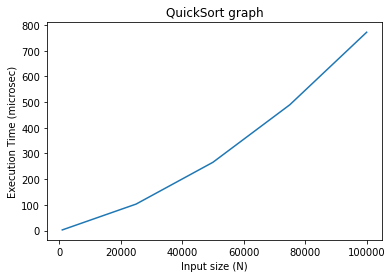

In [ ]:
plt.plot(sizes, QuickSort_times,label="QuickSort")
plt.title("QuickSort graph")

plt.xlabel("Input size (N)")
plt.ylabel("Execution Time (microsec)")

plt.show()

<a name="part1_2"></a>
## 2 - Merge Sort

Merge Sort is a divide and conquer sorting algorithm, it divides the input array into two halves and calls itself recursively to sort each of those halves and then combines them together along with sorting. The process is as follows:

1. The middle index is found and the array is subdivided into two sub arrays.
2. Each of the two halves is broken down into single elements via recursively calling the `MergeSort()` function.
3. The conquer part is using the `Merge()` function that sorts every sub-array and merges it with the next one until the final array is completely sorted.

**Merging algorithm:** The merge sort is all about the merging algorithm, it breaks the array into two sub-arrays stored temporarily in L[ ] and R[ ] recursively until every element is compared to the one next to it, they’re stored correctly and recursively combines the individual arrays until the last one is completely sorted.

**The time complexity of Merge Sort is `O(n log n)`**, where **n** is the number of elements in the input array. This makes Merge Sort one of the most efficient sorting algorithms, especially for large inputs. **The space complexity of Merge Sort is `O(n)`**, as it requires an auxiliary array of the same size as the input array to store the temporary subarrays during the sorting process.

###2.1 Merge Sort's implementation

In [ ]:
def MergeSort(array, start_index, end_index):
    # base case: if the array has length 1 or less, it is already sorted
    if start_index >= end_index:
        return
    
    # find the midpoint of the array
    mid_index = start_index + (end_index - start_index) // 2
    
    # recursively sort the left and right halves of the array
    MergeSort(array, start_index, mid_index)
    MergeSort(array, mid_index + 1, end_index)
    
    # merge the sorted halves of the array
    Merge(array, start_index, mid_index, end_index)

def Merge(array, start_index, mid_index, end_index):
    # calculate the lengths of the left and right subarrays
    left_length = mid_index - start_index + 1
    right_length = end_index - mid_index
    
    # create temporary arrays to hold the left and right subarrays
    left_array = [array[start_index + i] for i in range(left_length)]
    right_array = [array[mid_index + j + 1] for j in range(right_length)]
    
    # initialize pointers for iterating through the temporary arrays and the final merged array
    left_index = right_index = 0
    array_index = start_index
    
    # merge the two temporary arrays into a single sorted array
    while left_index < left_length and right_index < right_length:
        if left_array[left_index] <= right_array[right_index]:
            array[array_index] = left_array[left_index]
            left_index += 1
        else:
            array[array_index] = right_array[right_index]
            right_index += 1
        array_index += 1
    
    # append any remaining elements from the left or right temporary array
    while left_index < left_length:
        array[array_index] = left_array[left_index]
        left_index += 1
        array_index += 1
    while right_index < right_length:
        array[array_index] = right_array[right_index]
        right_index += 1
        array_index += 1


###2.2 Merge Sort's Running Time Performance

In [ ]:
MergeSort_times = []
multiple_arrays_ms=copy.deepcopy(array_of_arrays) # to prevent the change of array_of_arrays variable values/ make the random numbers the same for all other sorting techni

for arr in multiple_arrays_ms:
    n=len(arr)

    start_time = time.time()

    MergeSort(arr, 0, n-1)

    end_time = time.time()
    elapsed_time_ms = (end_time - start_time) * 1000
    MergeSort_times.append(elapsed_time_ms)

    print(f"Running time for Merge Sort for array size of {n} is {elapsed_time_ms:.2f} ms")

Running time for Merge Sort for array size of 1000 is 3.76 ms
Running time for Merge Sort for array size of 25000 is 138.67 ms
Running time for Merge Sort for array size of 50000 is 284.21 ms
Running time for Merge Sort for array size of 75000 is 459.17 ms
Running time for Merge Sort for array size of 100000 is 625.15 ms


###2.3 Merge Sort Graph - Time (milliseconds) vs Array Size

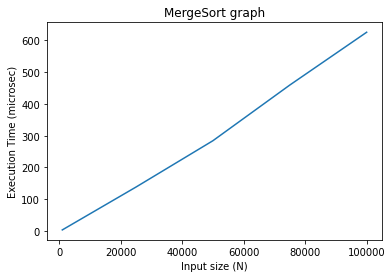

In [ ]:
plt.plot(sizes, MergeSort_times, label="MergeSort")
plt.title("MergeSort graph")

plt.xlabel("Input size (N)")
plt.ylabel("Execution Time (microsec)")

plt.show()

<a name="part1_3"></a>
## 3 - Heap Sort

Heap Sort is another efficient sorting algorithm that uses a binary heap data structure to sort an array of elements. The process is as follows:
1. The algorithm first builds a max heap from the array, which is a binary tree where the value of each parent node is greater than or equal to its children.
2. Once the max heap is built, the largest element (the root node) is removed and swapped with the last element of the array.
3. The max heap is then restored by calling the max_heapify() function on the root node to ensure it is still the largest element in the heap.

This process is repeated until the entire array is sorted. `The build_max_heap()` function is used to build the max heap initially, while the `max_heapify()` function is used to maintain the heap property after each element is removed.

**Max Heapify algorithm:** The `max_heapify()` function takes a binary tree and ensures that the parent node is the largest node in the tree by recursively checking and swapping the parent node with its largest child node. It assumes that the left and right subtrees of the parent node are already max heaps.

**Build Max Heap algorithm:** The `build_max_heap()` function creates a max heap from an unsorted array by starting at the middle index and calling `max_heapify()` on each parent node from the middle to the beginning of the array.

**The time complexity of heap sort is `O(n log n)`** in the worst case, where **'n'** is the number of elements to be sorted. This is because **building a heap takes `O(n)` time**, and **extracting the maximum element and restoring the heap property takes `O(log n)` time**. 

Since we need to perform these operations for all 'n' elements, **the total time complexity becomes `O(n log n)`**.

**The space complexity of heap sort is `O(1)`**, as it sorts the input array in place without requiring any extra memory.

###3.1 Heap Sort's implementation

In [ ]:
def HeapSort(arr):
    n = len(arr)
    build_max_heap(arr, n)
    for i in range(n-1, 0, -1):
        arr[0], arr[i] = arr[i], arr[0]
        max_heapify(arr, i, 0)
    return arr

def build_max_heap(arr, n):
    for i in range(n//2, -1, -1):
        max_heapify(arr, n, i)

def max_heapify(arr, n, i):
    largest = i
    left = 2*i + 1
    right = 2*i + 2

    if left < n and arr[left] > arr[largest]:
        largest = left

    if right < n and arr[right] > arr[largest]:
        largest = right

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        max_heapify(arr, n, largest)

###3.2 Heap Sort's Running Time Performance

In [ ]:
HeapSort_times = []
multiple_arrays_hs=copy.deepcopy(array_of_arrays) # to prevent the change of array_of_arrays variable values/ make the random numbers the same for all other sorting techni

for arr in multiple_arrays_hs:
    n=len(arr)

    start_time = time.time()

    HeapSort(arr)

    end_time = time.time()
    elapsed_time_ms = (end_time - start_time) * 1000
    HeapSort_times.append(elapsed_time_ms)

    print(f"Running time for Heap Sort for array size of {n} is {elapsed_time_ms:.2f} ms")

Running time for Heap Sort for array size of 1000 is 3.92 ms
Running time for Heap Sort for array size of 25000 is 166.58 ms
Running time for Heap Sort for array size of 50000 is 363.60 ms
Running time for Heap Sort for array size of 75000 is 603.04 ms
Running time for Heap Sort for array size of 100000 is 777.90 ms


###3.3 Heap Sort Graph - Time (milliseconds) vs Array Size

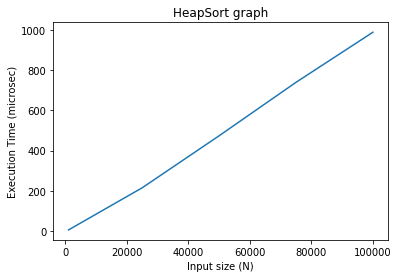

In [ ]:
plt.plot(sizes, HeapSort_times, label="HeapSort")
plt.title("HeapSort graph")

plt.xlabel("Input size (N)")
plt.ylabel("Execution Time (microsec)")

plt.show()

<a name="part1_4"></a>
## 4 - Selection Sort

Selection sort is a simple sorting algorithm that works by repeatedly selecting the minimum element from the unsorted part of the array and placing it at the beginning of the sorted part of the array. The process is as follows:

1. Find the minimum element in the unsorted part of the array.
2. Swap it with the first element of the unsorted part of the array.
3. Move the boundary of the sorted part of the array one element to the right.

This process is repeated until the entire array is sorted. **The time complexity of selection sort is `O(n^2)`**, where **'n'** is the number of elements to be sorted. This is because it involves two nested loops, one for iterating through each element of the array, and another for finding the minimum element in the unsorted part of the array. 

**The space complexity of selection sort is `O(1)`**, as it sorts the input array in place without requiring any extra memory. 

Although selection sort is a simple algorithm, it is not very efficient for large arrays as its time complexity is quadratic.

###4.1 Selection Sort's implementation

In [ ]:
def SelectionSort(arr, start, end):  # function to perform selection sort on an array arr of size n
    for i in range(start, end+1):  # loop over the array
        min_index = i  # set the minimum value to be the current index i
        for j in range(i + 1, end+1):  # loop over the remaining unsorted part of the array starting from i+1
            if arr[j] < arr[min_index]:  # if the current element is less than the current minimum
                min_index = j  # set the current minimum to be the current element
        arr[i], arr[min_index] = arr[min_index], arr[i]  # swap the current minimum with the ith element, i.e. move the smallest element to its sorted position

###4.2 Selection Sort's Running Time Performance

In [ ]:
SelectionSort_times = []
multiple_arrays_ss=copy.deepcopy(array_of_arrays) # to prevent the change of array_of_arrays variable values/ make the random numbers the same for all other sorting techni

for arr in multiple_arrays_ss:
    n=len(arr)

    start_time = time.time()

    SelectionSort(arr, 0, n-1)

    end_time = time.time()
    elapsed_time_ms = (end_time - start_time) * 1000
    SelectionSort_times.append(elapsed_time_ms)

    print(f"Running time for Selection Sort for array size of {n} is {elapsed_time_ms:.2f} ms")

Running time for Selection Sort for array size of 1000 is 82.21 ms
Running time for Selection Sort for array size of 25000 is 28854.35 ms
Running time for Selection Sort for array size of 50000 is 114072.17 ms
Running time for Selection Sort for array size of 75000 is 258970.20 ms
Running time for Selection Sort for array size of 100000 is 458629.00 ms


###4.3 Selection Sort Graph - Time (milliseconds) vs Array Size

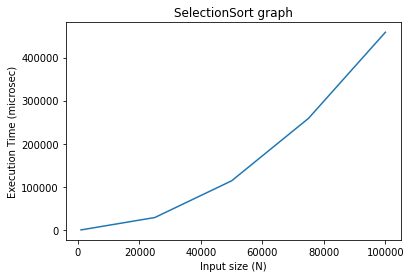

In [ ]:
plt.plot(sizes, SelectionSort_times, label="SelectionSort")
plt.title("SelectionSort graph")

plt.xlabel("Input size (N)")
plt.ylabel("Execution Time (microsec)")

plt.show()

<a name="part1_5"></a>
## 5 - Insertion Sort

Insertion sort is a simple sorting algorithm that works by repeatedly inserting each unsorted element into its correct position within the sorted part of the array. The process is as follows:

1. Take the first element from the unsorted part of the array.
2. Compare it with the elements in the sorted part of the array and insert it into its correct position.
3. Move the boundary of the sorted part of the array one element to the right.

This process is repeated for each unsorted element until the entire array is sorted. 

**The time complexity of insertion sort is `O(n^2)`**, where **'n'** is the number of elements to be sorted. This is because it involves two nested loops, one for iterating through each element of the array, and another for finding the correct position to insert each unsorted element. 

**The space complexity of insertion sort is `O(1)`**, as it sorts the input array in place without requiring any extra memory. 

Although insertion sort is a simple algorithm, it is efficient for small arrays and is also used in more complex sorting algorithms, such as merge sort and quick sort, for small subarrays.

###5.1 Insertion Sort's implementation

In [ ]:
def InsertionSort(arr):
    # Iterate through the array from the second element (index 1) to the last element (index len(array)-1)
    for i in range(1, len(arr)):
        # Set the key to the current element
        key = arr[i]
        # Set j to the index of the current element
        j = i
        # Compare the key with the elements to its left
        # If the element at index j-1 is greater than key and j > 0, move that element to the right by one position
        # Continue moving left until the element at index j-1 is no longer greater than key
        while j > 0 and arr[j - 1] > key:
            arr[j - 1], arr[j] = arr[j], arr[j - 1] # swap the current element with the element at index j-1
            j -= 1 # decrement j to continue moving left
        # Insert the key into its correct position in the array
        arr[j] = key


###5.2 Insertion Sort's Running Time Performance

In [ ]:
InsertionSort_times = []
multiple_arrays_is=copy.deepcopy(array_of_arrays) # to prevent the change of array_of_arrays variable values/ make the random numbers the same for all other sorting techni

for arr in multiple_arrays_is:
    n=len(arr)

    start_time = time.time()

    InsertionSort(arr)

    end_time = time.time()
    elapsed_time_ms = (end_time - start_time) * 1000
    InsertionSort_times.append(elapsed_time_ms)

    print(f"Running time for Insertion Sort for array size of {n} is {elapsed_time_ms:.2f} ms")

Running time for Insertion Sort for array size of 1000 is 67.11 ms
Running time for Insertion Sort for array size of 25000 is 44737.65 ms
Running time for Insertion Sort for array size of 50000 is 176318.13 ms
Running time for Insertion Sort for array size of 75000 is 392435.72 ms
Running time for Insertion Sort for array size of 100000 is 715010.65 ms


###5.3 Insertion Sort Graph - Time (milliseconds) vs Array Size

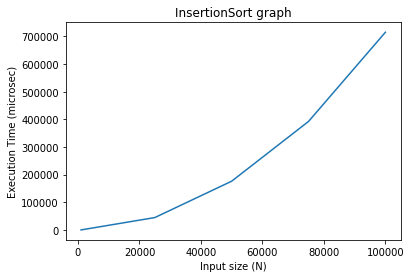

In [ ]:
plt.plot(sizes, InsertionSort_times, label="InsertionSort")
plt.title("InsertionSort graph")

plt.xlabel("Input size (N)")
plt.ylabel("Execution Time (microsec)")

plt.show()

<a name="part1_6"></a>
## **6 - Time comparison Report**


### 6.1 - Table and Graph

In [ ]:
""" Table """

headers = ['Array Size (N)', 'Quick Sort', 'Merge Sort', 'Heap Sort', 'Selection Sort', 'Insertion Sort']
table_data = []
for i in range(len(sizes)):
    table_data.append([sizes[i], QuickSort_times[i], MergeSort_times[i], HeapSort_times[i], SelectionSort_times[i], InsertionSort_times[i]])

print(tabulate(table_data, headers=headers, tablefmt='orgtbl'))

|   Array Size (N) |   Quick Sort |   Merge Sort |   Heap Sort |   Selection Sort |   Insertion Sort |
|------------------+--------------+--------------+-------------+------------------+------------------|
|             1000 |      2.35176 |      3.76272 |     3.92127 |            82.21 |          67.1136 |
|            25000 |    102.886   |    138.667   |   166.582   |         28854.3  |       44737.6    |
|            50000 |    265.612   |    284.213   |   363.601   |        114072    |      176318      |
|            75000 |    489.395   |    459.166   |   603.043   |        258970    |      392436      |
|           100000 |    771.734   |    625.155   |   777.902   |        458629    |      715011      |


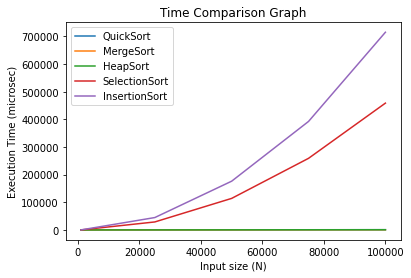

In [ ]:
""" Graph """

plt.title("Time Comparison Graph")

plt.plot(sizes, QuickSort_times,label="QuickSort")
plt.plot(sizes, MergeSort_times, label="MergeSort")
plt.plot(sizes, HeapSort_times, label="HeapSort")
plt.plot(sizes, SelectionSort_times, label="SelectionSort")
plt.plot(sizes, InsertionSort_times, label="InsertionSort")

plt.xlabel("Input size (N)")
plt.ylabel("Execution Time (microsec)")

plt.legend()
plt.show()

#### Here we notice that the QuickSort, HeapSort and the MergeSort are similar to each other.

#### Thus, another graph was plotted to show the difference between them

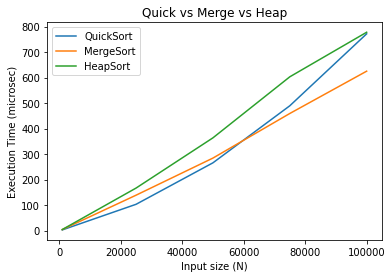

In [ ]:
plt.title("Quick vs Merge vs Heap")

plt.plot(sizes, QuickSort_times,label="QuickSort")
plt.plot(sizes, MergeSort_times, label="MergeSort")
plt.plot(sizes, HeapSort_times, label="HeapSort")

plt.xlabel("Input size (N)")
plt.ylabel("Execution Time (microsec)")

plt.legend()
plt.show()


### 6.2 - Conclusion

#### From the graphs, we can observe that for smaller input sizes (up to 1000), all the algorithms perform comparably fast, with Insertion Sort being slightly faster than the others. However, for larger input sizes, Quick Sort, Merge Sort, and Heap Sort algorithms outperform the Selection Sort and Insertion Sort algorithms by a wide margin.

#### In general, Merge Sort has the fastest execution time, followed by Quick Sort and Heap Sort. On the other hand, Selection Sort and Insertion Sort have the slowest execution time and are not suitable for large input sizes. Therefore, for large input sizes, it is better to use Quick Sort, Merge Sort, or Heap Sort.

# **Part 2**

<a name="part2_1"></a>
## 1 - Hybrid Merge and Selection Algorithm

It is a sorting algorithm that can mix between
Merge and Selection.

It is an implemented Merge sort that expects an extra
parameter **THRESHOLD** that when the array size is less than or equal to this threshold, the sorting algorithm will switch from **Merge to Selection**.

Here's an example of how it processes:

1. Given an array of SIZE=50 and THRESHOLD=6
2. Array will split into 2 arrays of size 25 - 25
3. First Array will split into 2 arrays of size 12 - 13
4. First Array will split into 2 arrays of size 6 - 6 ← NOTE
5. Instead of continuing to break down the array and as the threshold is
matched Selection sort will be used and return sorted array

### 1.1 - Hybrid Merge and Selection Algorithm's implementation

In [ ]:
# Define the function for hybrid merge sort
def HybridMergeSort(array, start, end, threshold):
  # Check if the subarray to be sorted is not empty
  if start < end :
    # If the size of the subarray is less than or equal to the threshold,
    # use selection sort to sort the subarray
    if end - start <= threshold:
      SelectionSort(array, start, end)
    # If the size of the subarray is larger than the threshold,
    # recursively call hybrid merge sort on the left and right halves
    else:
      mid = start + (end - start) // 2
      HybridMergeSort(array, start, mid, threshold)
      HybridMergeSort(array, mid + 1, end, threshold)
      # Merge the two sorted subarrays
      Merge(array, start, mid, end)

### 1.2 - Hybrid Merge and Selection Algorithm's Running Time Performance

In [ ]:
HybridMergeSelection_times = []
multiple_arrays_hypMS=copy.deepcopy(array_of_arrays) # to prevent the change of array_of_arrays variable values/ make the random numbers the same for all other sorting techni
# Assume threshold = 6
threshold = 6

for arr in multiple_arrays_hypMS:
    n=len(arr)

    start_time = time.time()

    HybridMergeSort(arr, 0, n-1, threshold)

    end_time = time.time()
    elapsed_time_ms = (end_time - start_time) * 1000
    HybridMergeSelection_times.append(elapsed_time_ms)

    print(f"Running time for Hybrid Merge and Selection Algorithm for array size of {n} is {elapsed_time_ms:.2f} ms")

Running time for Hybrid Merge and Selection Algorithm for array size of 1000 is 3.33 ms
Running time for Hybrid Merge and Selection Algorithm for array size of 25000 is 108.21 ms
Running time for Hybrid Merge and Selection Algorithm for array size of 50000 is 266.83 ms
Running time for Hybrid Merge and Selection Algorithm for array size of 75000 is 383.61 ms
Running time for Hybrid Merge and Selection Algorithm for array size of 100000 is 512.05 ms


###1.3 Hybrid Merge and Selection Algorithm Graph - Time (milliseconds) vs Array Size

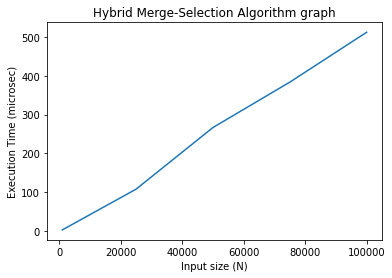

In [ ]:
plt.plot(sizes, HybridMergeSelection_times, label="HybridMergeSelection")
plt.title("Hybrid Merge-Selection Algorithm graph")

plt.xlabel("Input size (N)")
plt.ylabel("Execution Time (microsec)")

plt.show()

<a name="part2_2"></a>
##2 - Find Kth Element in Unsorted Array

The quickselect algorithm is an efficient way to find the Kth smallest element in an unsorted array. It works by using the partition function of quicksort to recursively narrow down the search range until the Kth element is found.

For example, if we have an array of 50 elements and want to find the 8th smallest element, we can use quickselect to efficiently find it without having to sort the entire array.

### 2.1 - Find Kth Element in Unsorted Array's implementation

In [ ]:
def kth_smallest(array, start, end, k):
  if start >= end:
    return array[start]
  pivot = randomized_partition(array, start, end) #partition around pivot
  rank = pivot-start+1 #get rank of pivot (if start doesn't equal 0)
  if rank == k: #if rank of pivot is the same as demanded
    return array[pivot]
  elif rank < k: #if rank of pivot smaller than demanded recurse on right part of array while changing k to be k-rank
    return kth_smallest(array, pivot+1, end, k-rank)
  else: #if rank of pivot greater than demanded recurse on left part of array
    return kth_smallest(array, start, pivot-1, k)

### 2.2 - Find Kth Element in Unsorted Array Running Time Perfomance

In [ ]:
kth_element_unsorted_array_times = []
multiple_arrays_kth=copy.deepcopy(array_of_arrays) # to prevent the change of array_of_arrays variable values/ make the random numbers the same for all other sorting techni
# Assume kth samllest = 6
k = 6

for arr in multiple_arrays_kth:
    n=len(arr)

    start_time = time.time()

    kth_smallest(arr, 0, n-1, k)

    end_time = time.time()
    elapsed_time_ms = (end_time - start_time) * 1000
    kth_element_unsorted_array_times.append(elapsed_time_ms)

    print(f"Running time for finding Kth Element in Unsorted Array for array size of {n} is {elapsed_time_ms:.2f} ms")

Running time for finding Kth Element in Unsorted Array for array size of 1000 is 0.27 ms
Running time for finding Kth Element in Unsorted Array for array size of 25000 is 6.95 ms
Running time for finding Kth Element in Unsorted Array for array size of 50000 is 4.52 ms
Running time for finding Kth Element in Unsorted Array for array size of 75000 is 18.34 ms
Running time for finding Kth Element in Unsorted Array for array size of 100000 is 12.18 ms


###2.3 Find Kth Element in Unsorted Array Graph - Time (milliseconds) vs Array Size

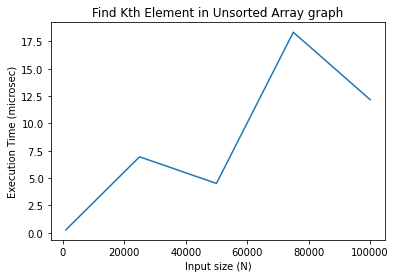

In [ ]:
plt.plot(sizes, kth_element_unsorted_array_times, label="Find Kth Element in Unsorted Array")
plt.title("Find Kth Element in Unsorted Array graph")

plt.xlabel("Input size (N)")
plt.ylabel("Execution Time (microsec)")

plt.show()